## Preprocessing

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.shape 

(37249, 2)

In [5]:
df.sample()['clean_comment'].values

array(['what the difference both the ideas are jhumla the end the day '],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [7]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [8]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [9]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(350)

In [12]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [16]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [17]:
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [18]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [19]:
df['clean_comment'] = df['clean_comment'].str.strip()
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [20]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]
comments_with_urls.head()

,clean_comment,category


In [21]:
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [22]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


In [23]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


## EDA

<Axes: xlabel='category', ylabel='count'>

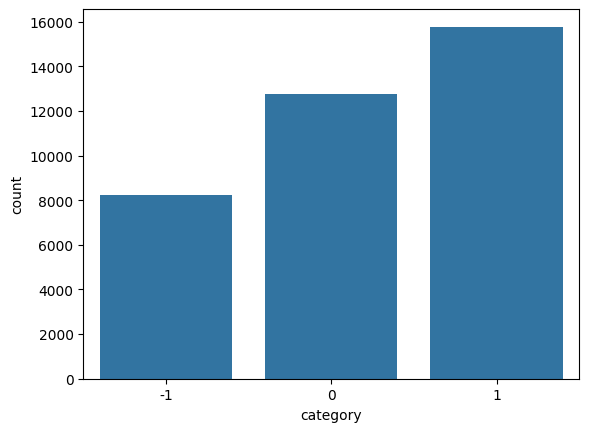

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x="category")

In [25]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [26]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [27]:
df.sample(5)

,clean_comment,category,word_count
4709,kuch bhi bolo anajna aah kashyap hai katai,0,8
34758,thief what theif does,0,4
19478,heil modi kaka,0,3
17698,chess from msd edging ball every now and then ...,0,12
8943,such novice but the child thing getting badly ...,-1,23


In [28]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

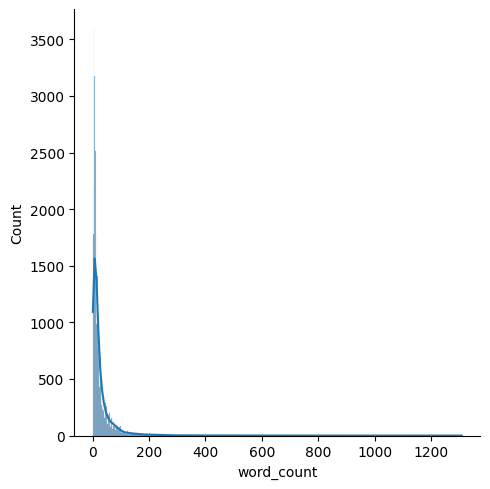

In [29]:
sns.displot(df['word_count'], kde=True)

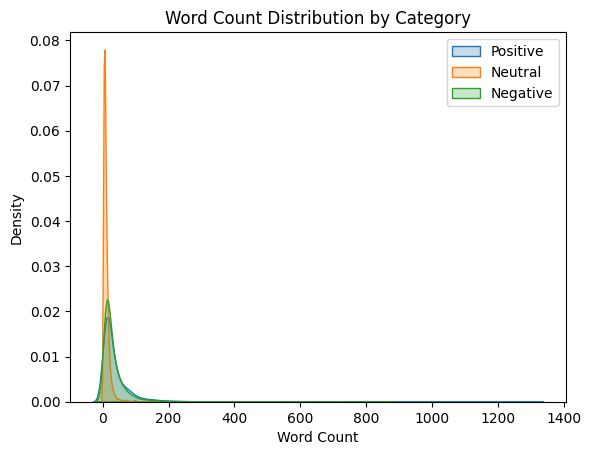

In [30]:
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

plt.legend()
plt.show()

<Axes: ylabel='word_count'>

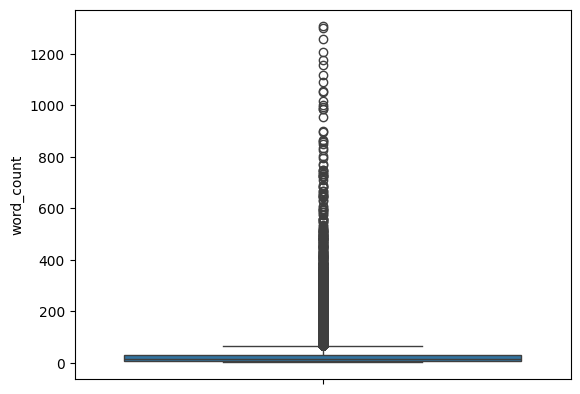

In [31]:
sns.boxplot(df['word_count'])

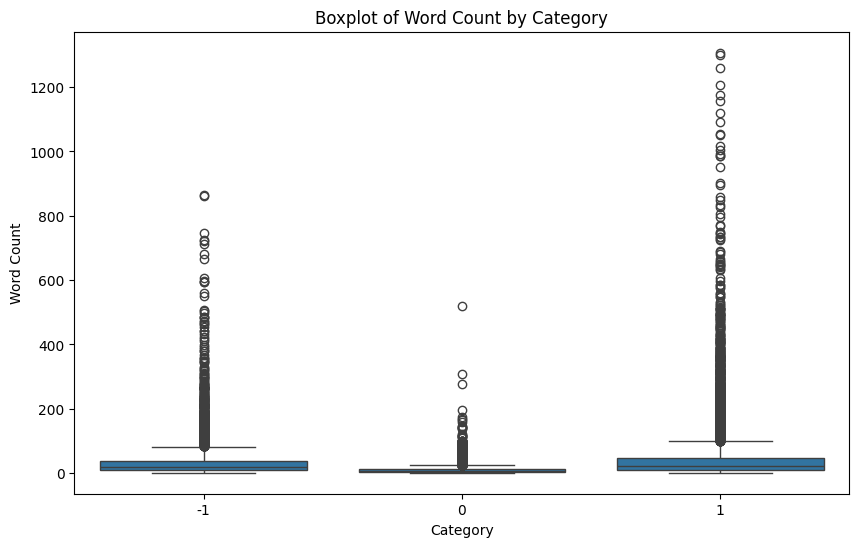

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

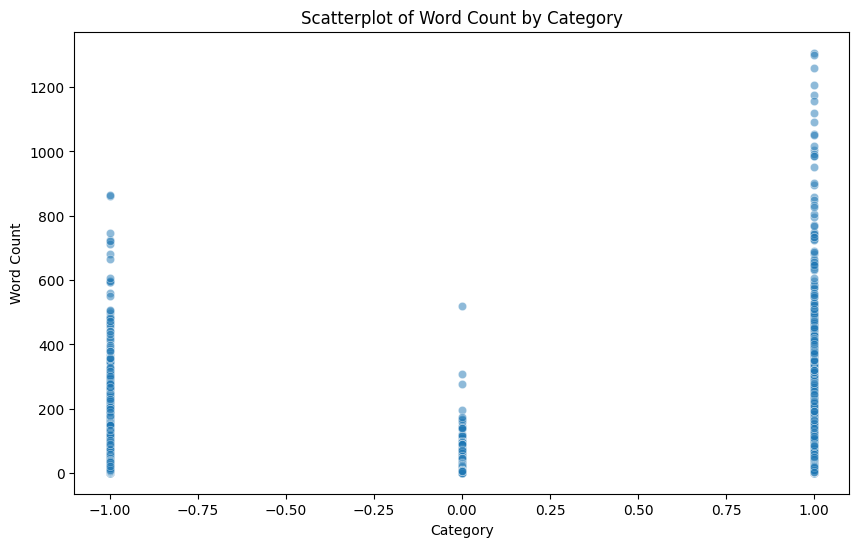

In [33]:
# scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

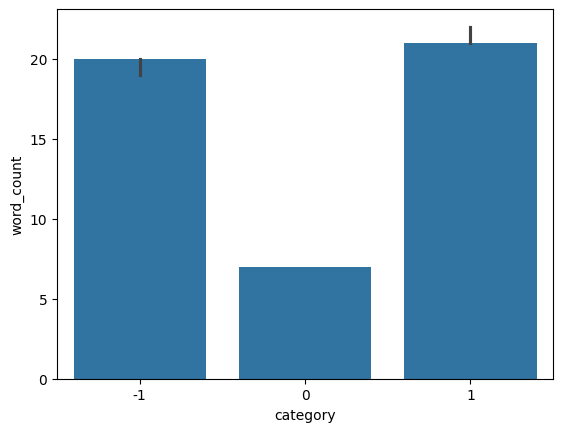

In [34]:
sns.barplot(df, x='category', y='word_count', estimator='median')

In [35]:
!pip install nltk

In [36]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words])) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
16161,bharatiya jaanleva party,0,3,0
24099,this will called modi bofors moment isn,0,7,3
35219,hehe father gave that same diary,0,6,2
24569,the world won end next year,0,6,2
17074,will travelling gujarat that time vote voter s...,1,50,20


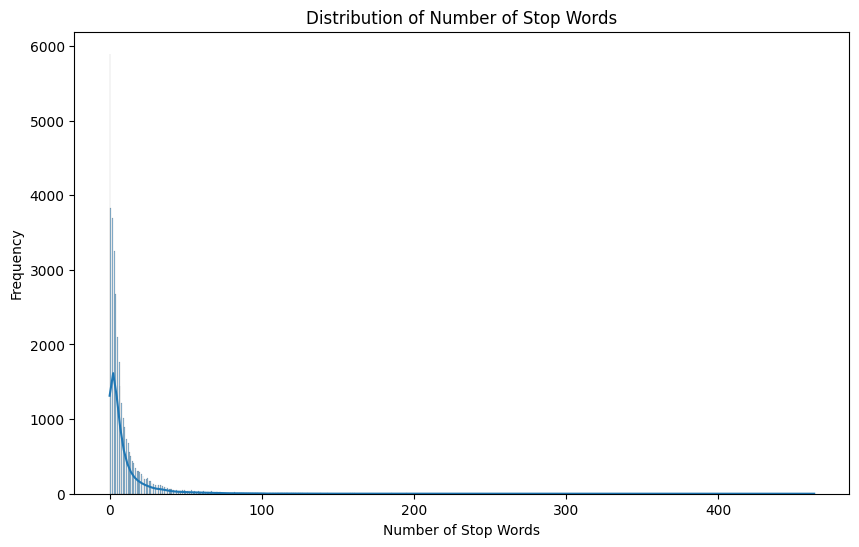

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Number of Stop Words')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

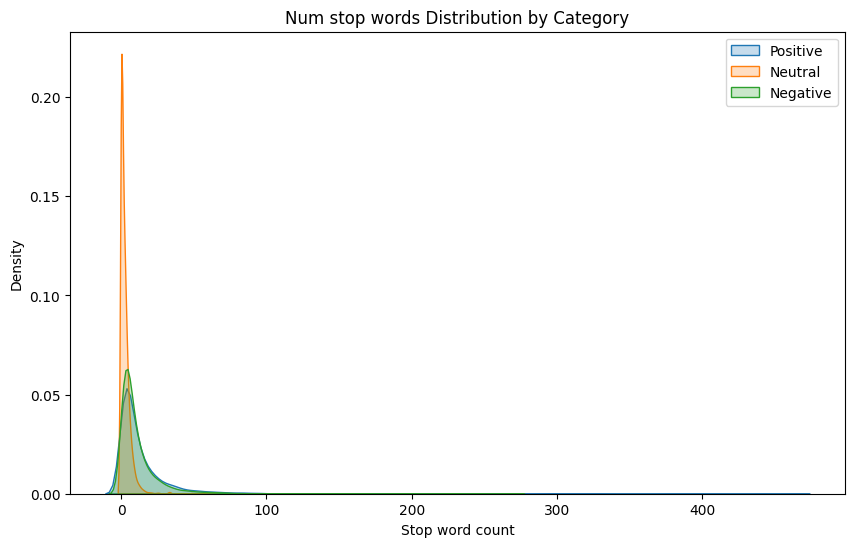

In [39]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

plt.legend()

<Axes: xlabel='category', ylabel='num_stop_words'>

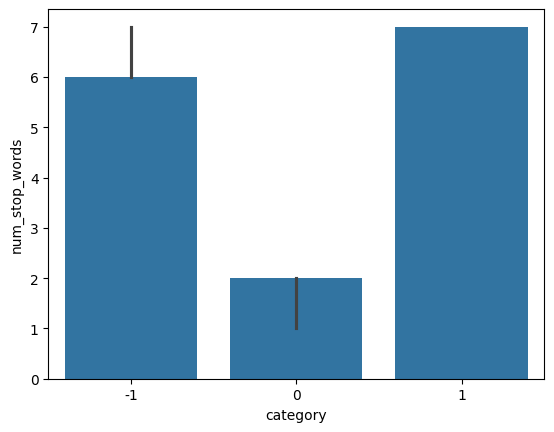

In [40]:
#median word counts among sentiments
sns.barplot(df, x='category', y='num_stop_words', estimator='median')

C:\Users\USER\AppData\Local\Temp\ipykernel_27720\2589149237.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_words', palette='viridis')


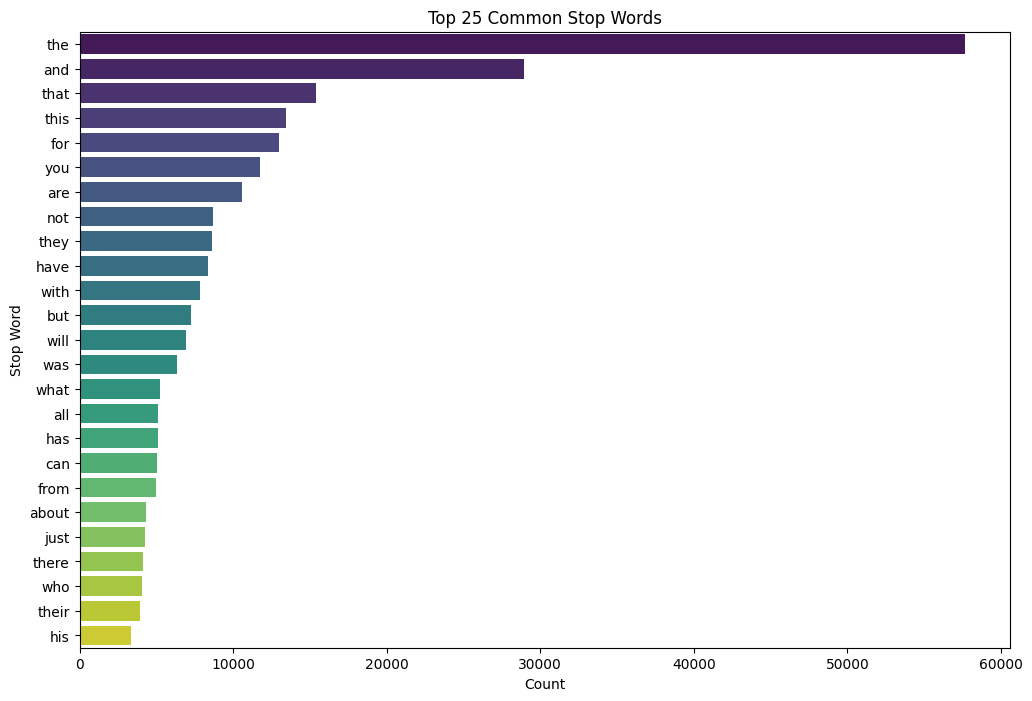

In [41]:
from collections import Counter

# Extract all stop words from comments
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words] 

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_words', 'count'])

# Create barplot Top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_words', palette='viridis')
plt.title('Top 25 Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [42]:
# Number of characters used in the comment
df['num_chars'] = df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [43]:
df['num_chars'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [44]:
from collections import Counter
all_text = ' '.join(df['clean_comment'])

char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [45]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '呗', 'ഥ', '杨'], dtype=object)

In [46]:
char_frequency_df.tail(50)

,character,frequency
1336,回,1
1337,毫,1
1322,足,1
1323,够,1
1324,假,1
1325,才,1
1326,叫,1
1327,醒,1
1328,妖,1
1329,婆,1


In [47]:
df['num_punctuation_chars'] = df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-']))
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
10619,not the incompetence the demonetization move t...,0,29,9,178,0
34856,absolute shameless,1,2,0,18,0
12734,know the bjp communal understand the deep ties...,-1,63,22,394,0
6254,major scam would unfurl that would lead many r...,1,35,4,223,0
28013,empty vessels something something,-1,4,0,33,0


In [48]:
df['num_punctuation_chars'].describe()

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_27720\3941928564.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


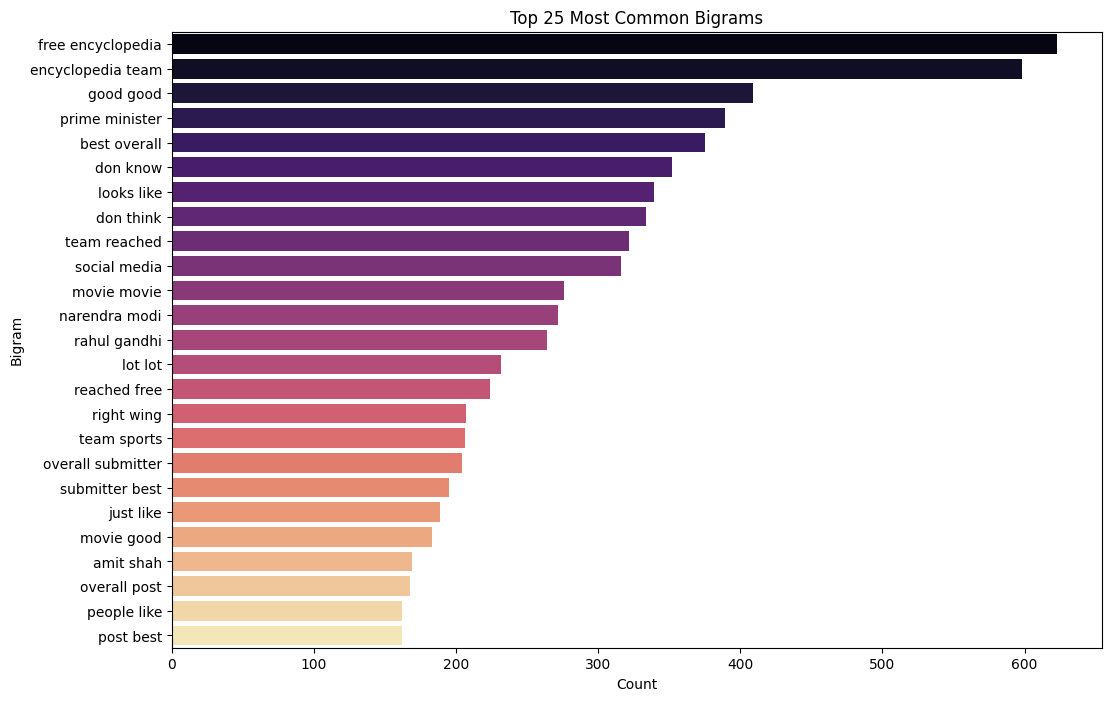

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract top 25 bigrams


def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

top_25_bigrams_df = pd.DataFrame(
        top_25_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_27720\3596370575.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


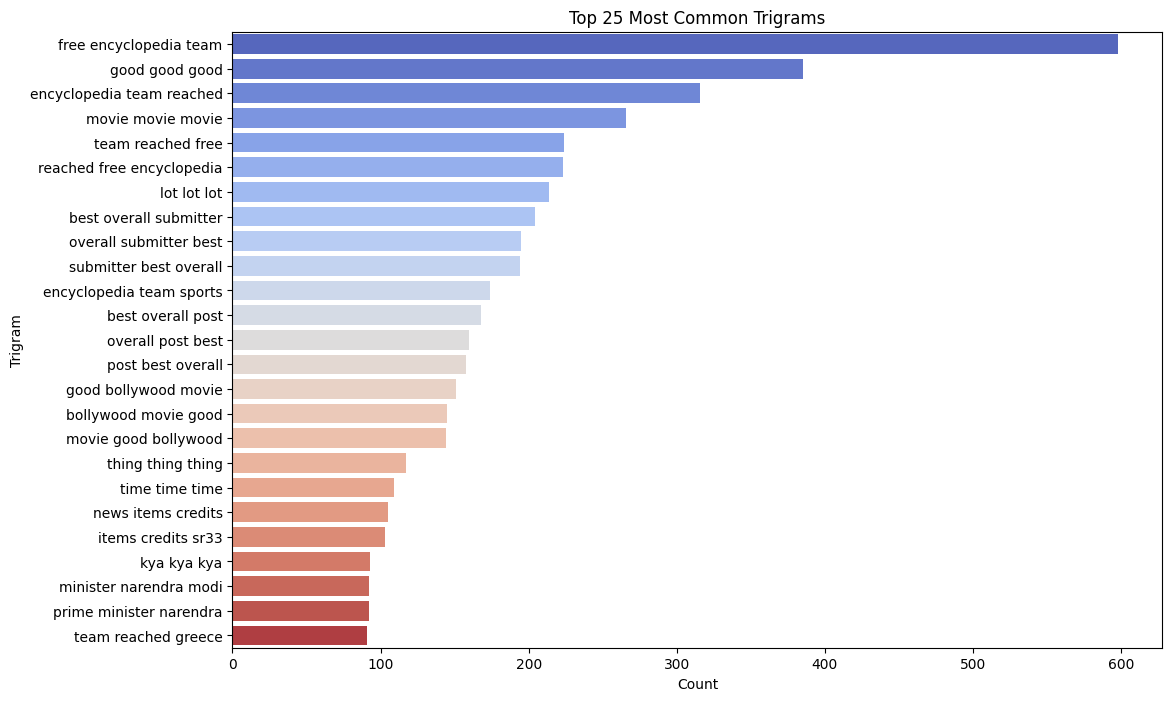

In [50]:
# Extract top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [51]:
# Remove non-english characters from 'clean_comment'
import re
df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [53]:
all_text = ' '.join(df['clean_comment'])

char_frequency = Counter(all_text)
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)
char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [54]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [55]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [56]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [57]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0
